In [77]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.io import loadmat

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [2]:
# load fingerprints, and then write into a single matrix. 
path2fings = '/home/ben/DATA_tmp/Geysers_3yrs_fingers/FNGRPRNTS/*'
finglist = glob.glob(path2fings)
N = len(finglist)
print(N)

46271


In [3]:
f0 = loadmat(finglist[0])['A2']
print(type(f0))
fingflat = f0.flatten()
n_fingflat = len(fingflat)
print(n_fingflat)


<class 'numpy.ndarray'>
225


In [57]:
Nsub = 300
inds_rand = np.random.randint(0,N,Nsub)

fingarray = np.zeros((Nsub,n_fingflat))

for i,irand in enumerate(inds_rand):
    f0 = loadmat(finglist[irand])['A2']
    fingflat = f0.flatten()
    fingarray[i,:] = fingflat
    #plt.plot(fingflat)



[0.27393773 0.20894041 0.12724312 0.09247878 0.06025729 0.04456802
 0.02936863 0.01762671 0.01270184 0.01231931]
(300, 10)
<class 'numpy.ndarray'>


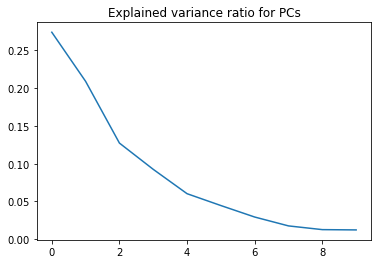

In [58]:
# PCA first: 
X = fingarray
pca = PCA(n_components=10)
pca.fit(X)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained variance ratio for PCs')

Xpcs = pca.fit_transform(X)
print(np.shape(Xpcs))
print(type(Xpcs))

# Linkage matrix

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage <br>
<br>
A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n+i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

(300, 10)
(299, 4)
(299, 4)
(299, 4)
(299, 4)


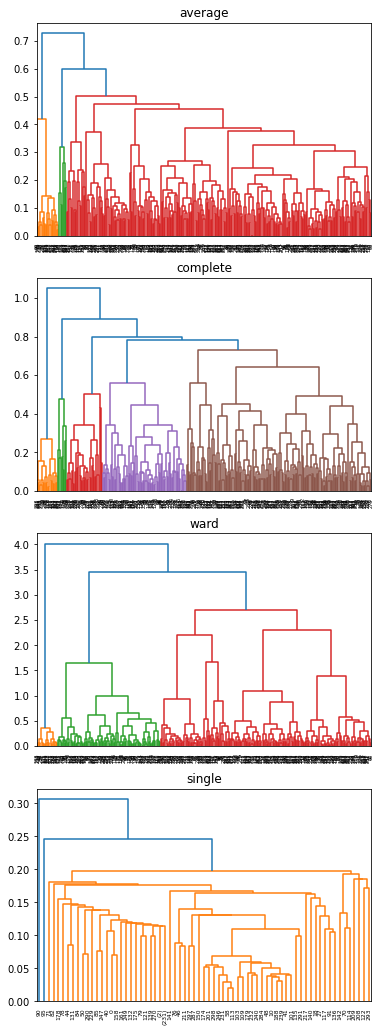

In [93]:
# # do the hierarchical clustering: 
# Xarray-like of shape (n_samples, n_features)
print(np.shape(Xpcs))

fig, axes = plt.subplots(4,1, figsize=(6,18))
linkage_list = ['average','complete','ward','single']

for i_lk, linktype in enumerate(linkage_list):

    linkage_mat = linkage(Xpcs, linktype)
    print(np.shape(linkage_mat))
    this_ax = axes[i_lk]
    dendrogram(linkage_mat, ax=this_ax, p=20, truncate_mode='level', orientation='top', distance_sort='descending')
    this_ax.set_title(linktype)
    


[[1.80000000e+02 2.78000000e+02 0.00000000e+00 2.00000000e+00]
 [5.80000000e+01 1.13000000e+02 2.07080877e-02 2.00000000e+00]
 [1.30000000e+02 2.19000000e+02 2.50022487e-02 2.00000000e+00]
 [1.95000000e+02 2.16000000e+02 2.52069703e-02 2.00000000e+00]
 [1.70000000e+01 2.57000000e+02 2.53839808e-02 2.00000000e+00]
 [1.38000000e+02 2.56000000e+02 2.65388770e-02 2.00000000e+00]]
[[2.08000000e+02 5.89000000e+02 1.84727583e-01 3.00000000e+00]
 [2.09000000e+02 5.93000000e+02 1.85675410e-01 4.00000000e+00]
 [5.76000000e+02 5.94000000e+02 1.93220353e-01 7.00000000e+00]
 [5.92000000e+02 5.95000000e+02 1.97905959e-01 2.98000000e+02]
 [9.50000000e+01 5.96000000e+02 2.45923309e-01 2.99000000e+02]]


Text(0.5, 1.0, 'Col 4: number of original observations ')

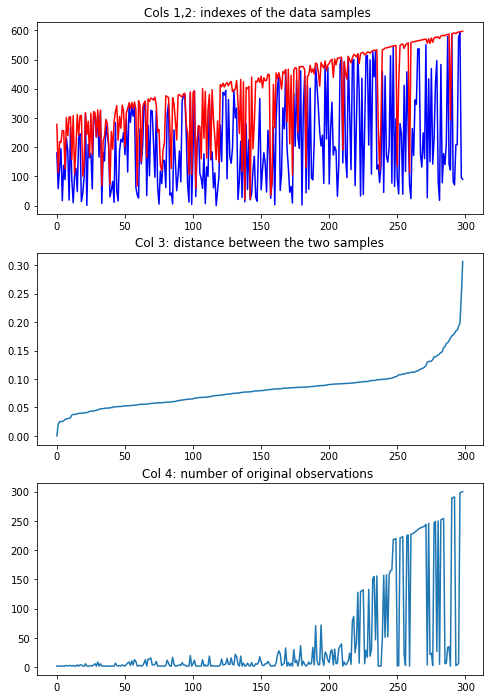

In [92]:
print(linkage_mat[0:6,0:4])
print(linkage_mat[-6:-1,0:4])

fig, axes = plt.subplots(3,1,figsize=(8,12))
axes[0].plot(linkage_mat[:,0],'b-')
axes[0].plot(linkage_mat[:,1], 'r-')
axes[0].set_title('Cols 1,2: indexes of the data samples ')

axes[1].plot(linkage_mat[:,2])
axes[1].set_title('Col 3: distance between the two samples')

axes[2].plot(linkage_mat[:,3])
axes[2].set_title('Col 4: number of original observations ')

#plt.figure(figsize=(15, 8))
  #,show_leaf_counts=True)
#             labels=labelList,
#             distance_sort='descending',
#             show_leaf_counts=True)
#plt.show()

# Agglomerative Clustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) <br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html <br>


https://jbhender.github.io/Stats506/F18/GP/Group10.html   <br>

In [86]:
from sklearn.cluster import AgglomerativeClustering

X = Xpcs
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
cluster_list = cluster.labels_
print(cluster_list)
print(len(cluster_list))

[2 2 1 4 2 4 2 4 2 1 3 1 4 5 1 2 5 1 0 1 2 2 5 2 5 4 5 0 2 1 2 1 2 2 2 4 5
 5 4 2 2 3 1 4 2 2 0 2 3 1 5 1 2 2 2 2 4 2 3 5 1 2 2 1 5 1 4 5 5 2 0 0 2 4
 2 4 0 2 2 4 1 4 1 2 5 5 1 2 1 2 0 0 5 2 2 1 2 5 2 1 2 3 2 3 2 1 2 4 5 3 5
 2 4 3 0 2 2 0 2 4 4 4 0 4 4 1 2 4 5 4 1 2 4 1 4 0 0 2 1 1 0 0 0 4 4 5 4 2
 1 5 0 5 4 2 2 1 2 2 2 2 2 4 2 1 2 2 4 4 2 2 2 4 4 2 3 4 2 1 4 3 2 5 1 5 4
 1 4 2 3 2 4 2 2 2 4 1 1 0 2 4 5 3 2 1 2 1 1 2 0 0 2 0 1 5 4 2 1 0 1 1 5 4
 5 4 5 1 1 4 5 4 1 3 3 1 2 4 2 4 2 3 3 1 1 2 4 4 3 5 4 4 2 1 5 4 2 4 1 1 1
 1 4 4 5 4 4 4 4 5 2 1 1 5 2 5 2 1 4 4 2 4 2 1 2 1 3 4 4 0 1 2 5 0 1 0 2 4
 2 5 3 1]
300
